In [ ]:
ut_cmd = "\"hicrep {1} {2} scc/{3}_{4} --h 1 --binSize 1000000 --dBPMax 5000000 2> /dev/null; cat scc/{3}_{4} | ~/scripts/hicrep_mean\""
lt_cmd = "\"hicrep {1} {2} scc/{3}_{4} --h 1 --binSize 100000 --dBPMax 5000000 2> /dev/null; cat scc/{3}_{4} | ~/scripts/hicrep_mean\""

filter1 = "\"pathlib-cli prefix {1}\""
filter2 = "\"pathlib-cli prefix {2}\""

!ls ~/data/*.mcool | \
versus-cli {filter1} {filter2} {ut_cmd} --slt-command {lt_cmd} --caption_index 2 3 | \
pandas-cli --layer result to dict > data.yaml && \
dataframe-vis-nb demo.ipynb 0 clustermap data.yaml

In [61]:

import pandas as pd
import yaml

with open("data.yaml", "r") as file:
    df = pd.DataFrame(yaml.safe_load(file))
df = df.map(lambda e: pandas.to_numeric(e, errors='coerce'))

print(df.head())
print(df.describe())



                 GSM4604276_868  GSM4604278_1953  GSM4604290_990
GSM4604276_868         1.000000         0.865908        0.898248
GSM4604278_1953        0.631334         1.000000        0.904402
GSM4604290_990         0.683017         0.721845        1.000000
       GSM4604276_868  GSM4604278_1953  GSM4604290_990
count        3.000000         3.000000        3.000000
mean         0.771450         0.862584        0.934217
std          0.199610         0.139107        0.057053
min          0.631334         0.721845        0.898248
25%          0.657175         0.793876        0.901325
50%          0.683017         0.865908        0.904402
75%          0.841508         0.932954        0.952201
max          1.000000         1.000000        1.000000


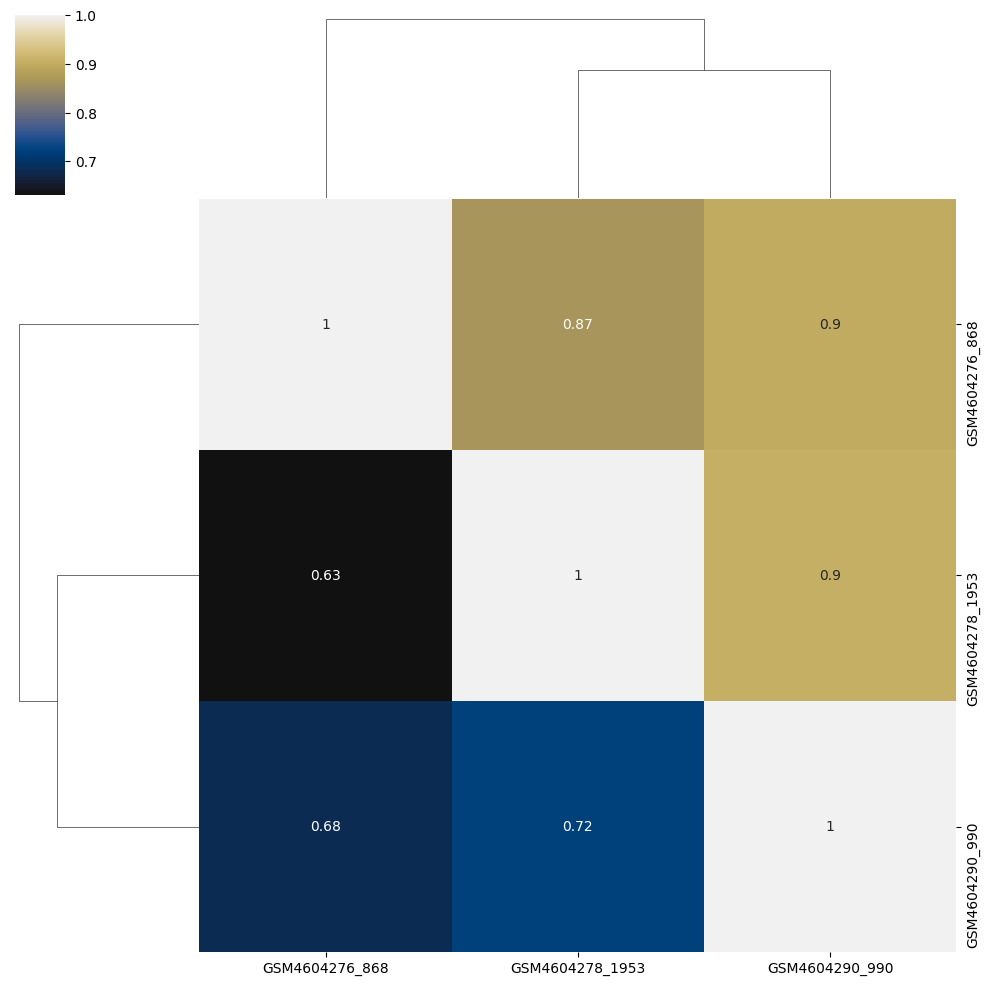

In [63]:

import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc

# Default colormap is perceptually-accurate and colorblind-friendly
# See https://colorcet.com/index.html for details
# Seaborn clustermap documentation
# https://seaborn.pydata.org/generated/seaborn.clustermap.html
sns.clustermap(df, 
               pivot_kws=None, 
               method='average', 
               metric='euclidean', 
               z_score=None, 
               standard_scale=None, 
               figsize=(10, 10), 
               cbar_kws=None, 
               row_cluster=True, 
               col_cluster=True, 
               row_linkage=None, 
               col_linkage=None, 
               row_colors=None, 
               col_colors=None, 
               mask=None, 
               dendrogram_ratio=0.2, 
               colors_ratio=0.03, 
               cbar_pos=(0.02, 0.8, 0.05, 0.18), 
               tree_kws=None, 
               cmap=cc.cm.CET_CBL1,
               annot=True)

